# Rating Buku dan Persebarannya

## Leonardus Wijaya / 1706042945

In [176]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import cufflinks as cf
import scipy.sparse as sp
from scipy.sparse.linalg import svds

## Data Rating Buku

In [120]:
Book_Ratings = pd.read_csv('/Users/leona/Downloads/Probabilitas dan Proses Stokastik/UAS/FINAL/BUKU/Ratings.csv')
Book_Ratings.head(10)

,UserID,ISBN,BookRating
0,276725,034545104X,0
1,276726,155061224,5
2,276727,446520802,0
3,276729,052165615X,3
4,276729,521795028,6
5,276733,2080674722,0
6,276736,3257224281,8
7,276737,600570967,6
8,276744,038550120X,7
9,276745,342310538,10


### Data user yang melakukan rating terbanyak

In [121]:
count_user = Book_Ratings.groupby('UserID').UserID.count().sort_values(ascending=False)
print_count = count_user.head(n=10)
print(print_count)

UserID
11676     13602
198711     7550
153662     6109
98391      5891
35859      5850
212898     4785
278418     4533
76352      3367
110973     3100
235105     3067
Name: UserID, dtype: int64


### Grafik data user yang melakukan rating

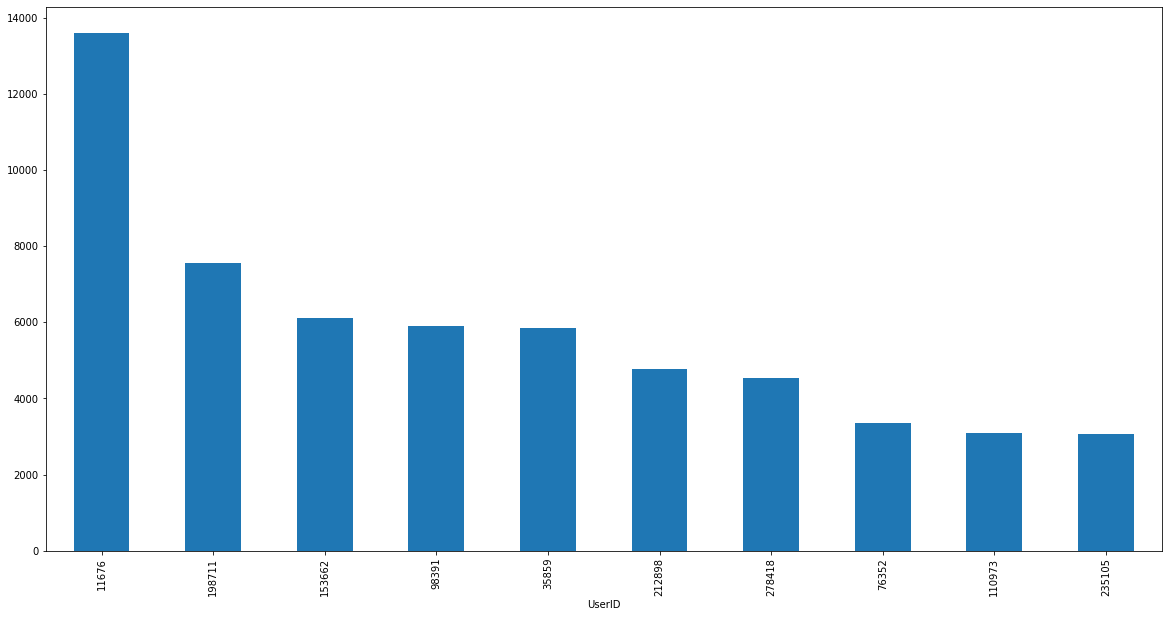

In [122]:
print_count.plot.bar(figsize=(20,10))

In [174]:
count_isbn = Book_Ratings.groupby('ISBN').ISBN.count().sort_values(ascending=False)
print_count = count_isbn.head(50)
print(print_count)

ISBN
971880107     2264
316666343     1164
385504209      813
312195516      668
60928336       662
044023722X     595
679781587      578
142001740      555
067976402X     552
671027360      536
446672211      527
316601950      518
059035342X     515
375727345      505
044021145X     487
452282152      486
440214041      479
804106304      476
440211727      469
60930535       453
345337662      449
440226430      442
743418174      436
671021001      434
312278586      430
345370775      422
156027321      417
440241073      417
446605239      415
671003755      401
60976845       393
1400034779     390
786868716      389
440222656      385
440234743      382
345361792      379
345417623      374
440221471      372
440236673      363
316769487      360
446610038      359
044022165X     359
446310786      355
385484518      349
60502258       348
375706771      348
440220602      344
140293248      337
440225701      335
446606812      333
Name: ISBN, dtype: int64


### Data user

In [127]:
Book_Readers = pd.read_csv('/Users/leona/Downloads/Probabilitas dan Proses Stokastik/UAS/FINAL/BUKU/Users.csv')
Book_Readers.head(10)

,UserID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN
5,6,"santa monica, california, usa",61.0
6,7,"washington, dc, usa",NaN
7,8,"timmins, ontario, canada",NaN
8,9,"germantown, tennessee, usa",NaN
9,10,"albacete, wisconsin, spain",26.0


### Data umur user

In [139]:
count_age = Book_Readers.groupby('Age').Age.count().sort_values(ascending=False)
print_count = count_age.head(50)
print(print_count)

Age
24.0    5687
25.0    5618
26.0    5547
23.0    5456
27.0    5383
28.0    5347
29.0    5293
32.0    4781
30.0    4778
22.0    4714
33.0    4699
31.0    4665
34.0    4656
21.0    4438
35.0    4194
20.0    4056
19.0    3950
36.0    3896
18.0    3703
37.0    3582
38.0    3404
39.0    3234
40.0    3142
17.0    3044
41.0    2919
43.0    2816
42.0    2758
44.0    2745
16.0    2570
46.0    2526
45.0    2518
47.0    2512
49.0    2461
15.0    2383
50.0    2340
48.0    2303
51.0    2203
54.0    2140
52.0    2077
53.0    2072
14.0    1962
55.0    1885
57.0    1878
56.0    1692
58.0    1319
59.0    1205
60.0    1125
61.0    1035
13.0     885
62.0     882
Name: Age, dtype: int64


### Grafik persebaran umur user

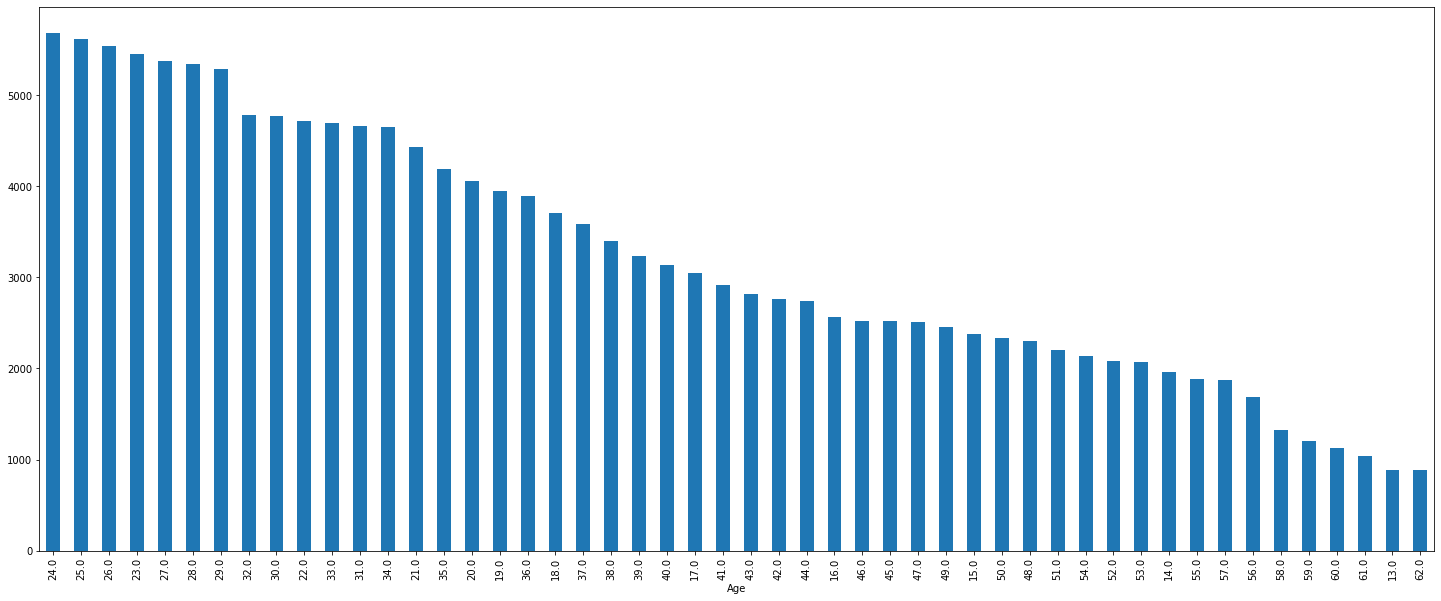

In [147]:
print_count.plot.bar(figsize=(25,10))

### Data User dan Pemberian Rating

In [132]:
RatingUSer = pd.merge(
  Book_Ratings, Book_Readers, 
  how="left",
  left_on="UserID",
  right_on="UserID"
)

In [133]:
RatingUSer.head()

,UserID,ISBN,BookRating,Location,Age
0,276725,034545104X,0,"tyler, texas, usa",NaN
1,276726,155061224,5,"seattle, washington, usa",NaN
2,276727,446520802,0,"h, new south wales, australia",16.0
3,276729,052165615X,3,"rijeka, n/a, croatia",16.0
4,276729,521795028,6,"rijeka, n/a, croatia",16.0


### Data Buku

In [158]:
Books = pd.read_excel('/Users/leona/Downloads/Probabilitas dan Proses Stokastik/UAS/FINAL/BUKU/Books.xlsx')
Books.head(10)

,ISBN,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,NaN,NaN,NaN
1,2005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,NaN,NaN,NaN
2,60973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,NaN,NaN,NaN
3,374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,NaN,NaN,NaN
4,393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,NaN,NaN,NaN
5,399135782,The Kitchen God's Wife,Amy Tan,1991,Putnam Pub Group,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,http://images.amazon.com/images/P/0399135782.0...,NaN,NaN,NaN
6,425176428,What If?: The World's Foremost Military Histor...,Robert Cowley,2000,Berkley Publishing Group,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,http://images.amazon.com/images/P/0425176428.0...,NaN,NaN,NaN
7,671870432,PLEADING GUILTY,Scott Turow,1993,Audioworks,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,http://images.amazon.com/images/P/0671870432.0...,NaN,NaN,NaN
8,679425608,Under the Black Flag: The Romance and the Real...,David Cordingly,1996,Random House,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,http://images.amazon.com/images/P/0679425608.0...,NaN,NaN,NaN
9,074322678X,Where You'll Find Me: And Other Stories,Ann Beattie,2002,Scribner,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,http://images.amazon.com/images/P/074322678X.0...,NaN,NaN,NaN


### Data User, rating, serta buku yang diberi rating

In [164]:
RatingUserBook = pd.merge(
  RatingUSer, Books, 
  how="left",
  left_on="ISBN",
  right_on="ISBN"
)

In [169]:
RatingUserBook.head(10)

,UserID,ISBN,BookRating,Location,Age,BookTitle,BookAuthor,YearOfPublication,Publisher,ImageURLS,ImageURLM,ImageURLL,Unnamed: 8,Unnamed: 9,Unnamed: 10
0,276725,034545104X,0,"tyler, texas, usa",NaN,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,http://images.amazon.com/images/P/034545104X.0...,NaN,NaN,NaN
1,276726,155061224,5,"seattle, washington, usa",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,276727,446520802,0,"h, new south wales, australia",16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,276729,052165615X,3,"rijeka, n/a, croatia",16.0,Help!: Level 1,Philip Prowse,1999,Cambridge University Press,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,http://images.amazon.com/images/P/052165615X.0...,NaN,NaN,NaN
4,276729,521795028,6,"rijeka, n/a, croatia",16.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,276733,2080674722,0,"paris, n/a, france",37.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,276736,3257224281,8,"salzburg, salzburg, austria",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,276737,600570967,6,"sydney, new south wales, australia",14.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,276744,038550120X,7,"torrance, california, usa",NaN,A Painted House,JOHN GRISHAM,2001,Doubleday,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,http://images.amazon.com/images/P/038550120X.0...,NaN,NaN,NaN
9,276745,342310538,10,"berlin, berlin, germany",27.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
